In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
img=cv2.imread(r"C:\\Users\Student\Desktop\pic07\008.jpg")


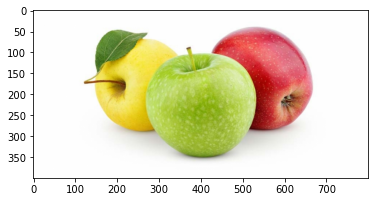

In [17]:
plt.imshow(img[...,::-1])
plt.show()

In [25]:
n=10
flat=img.reshape((-1,3))
kmeans=KMeans(n_clusters=n)
kmeans.fit(flat)
dominant_color=np.array(kmeans.cluster_centers_,dtype="uint8")

In [26]:
labels=kmeans.labels_

In [27]:
print(dominant_color)
print(labels)

[[253 253 253]
 [ 52 186 158]
 [123 120 223]
 [ 18  25 150]
 [ 93 227 243]
 [ 73  71 212]
 [ 47 126 101]
 [195 215 217]
 [108 214 191]
 [ 28 194 222]]
[0 0 0 ... 0 0 0]


In [28]:
len(labels)

320000

In [29]:
np.unique(labels,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([192480,  25864,  13879,   7229,  15006,  12112,   7676,  14224,
         24709,   6821], dtype=int64))

In [30]:
percentage=np.bincount(labels)/len(flat)
percentage

array([0.6015    , 0.080825  , 0.04337187, 0.02259062, 0.04689375,
       0.03785   , 0.0239875 , 0.04445   , 0.07721562, 0.02131563])

In [31]:
p_and_color=zip(percentage,dominant_color)
p_and_color=sorted(p_and_color,reverse=True)


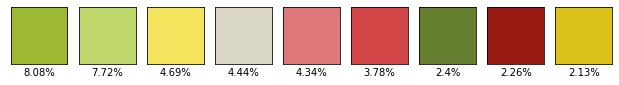

In [32]:
block=np.ones((50,50,3),dtype="uint8")
plt.figure(figsize=(12,8))
for i in range(1,n):
    plt.subplot(1,n,i+1)
    block[:]=p_and_color[i][1][::-1]
    plt.imshow(block)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(str(round(p_and_color[i][0]*100,2))+"%")
plt.show()